# Computer Vision Assignment 1 Part 1
---

Semester: **Fall 2023**

Due date: **October 5th 2023, 11.59PM EST.**

## Introduction
---

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used:
- MNIST (handwritten digits)
- CIFAR-10 (32x32 resolution color images of 10 object classes)

## Instructions
---

You should perform this assignment using Google Colab.
* Before starting, clone this assignment using `File > Save a copy in Drive`.
* After you're done, go through the notebook and ensure that you have answered all questions.
* Finally, submit the ipynb `File > Download > Download .ipynb` on brightspace


## 1. Warmup [5%]
---

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand. MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. On the other hand, CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The train/test split is 50k/10k.

* (a) Display 10 random images from each class of MNIST
* (b) Do the same for each class of CIFAR-10

Use `matplotlib` and ipython notebook's visualization capabilities. See [this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) for hints on how to achieve this.

## 2. Training a Single Layer Network on MNIST [10%]
---

* (a) Start by running the training on MNIST and train the model for 20 epochs.
By default, the model will train on MNIST.

This will initialize a single layer model and train it on the 60,000 MNIST training images for 1 epoch (passes through the training data). The loss function ([cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy)) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`. The default values for the learning rate, batch size and number of epochs are given in the `options` cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. Note the decrease in training loss and corresponding decrease in validation errors.

* (b): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

* (c): Reduce the number of training examples to just 50. (Hint: limit the iterator in the `train` function) and train the model until the loss converges. Explain what is happening to the model.

## 3. Training a Multi-Layer Network on MNIST [10%]
---

* (a) Add an extra layer with 1000 hidden units and a `tanh` nonlinearity. (Hint: modify the `Net` class). Train the model for 10 epochs.
* (b) Now set the learning rate to 10 and observe what happens during training. Give a brief explanation of your observations

## 4. Training a Convolutional Network on CIFAR [25%]
---

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- (a) Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

* (b) Train it for 20 epochs on the CIFAR-10 training set. Show an image of the first layer filters.

* (c) Give a breakdown of the parameters within the above model, and the overall number.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist). Also, you may speed up training if you use a GPU runtime (`RunTime > Change Runtime Type > GPU`).

In [2]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [5]:
# Options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01         # learning rate

In [3]:
# Data Loading
# This cell might take some time when you run it for the first time,
# because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

100%|██████████| 9912422/9912422 [00:00<00:00, 84904704.64it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 10968461.95it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 28705101.49it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1011980.28it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



#Question 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms

# Function to display 10 random images from a dataset
def display_random_images(dataset, dataset_name):
    classes = dataset.classes

    # Create subplots for each class
    fig, axs = plt.subplots(len(classes), 10, figsize=(12, 12))
    fig.subplots_adjust(hspace=0.5)

    for i, class_name in enumerate(classes):
        class_indices = [idx for idx, label in enumerate(dataset.targets) if label == i]
        random_indices = np.random.choice(class_indices, 10, replace=False)

        for j, idx in enumerate(random_indices):
            image, label = dataset[idx]

            if dataset_name == 'mnist':
                image = image.numpy().squeeze()
                axs[i, j].imshow(image)
            elif dataset_name == 'cifar10':
                image = np.transpose(image.numpy(), (1, 2, 0))
                axs[i, j].imshow(image)

            axs[i, j].axis('off')
            if j == 0:
                axs[i, j].set_title(f'Class {i} ({class_name})')

    plt.show()

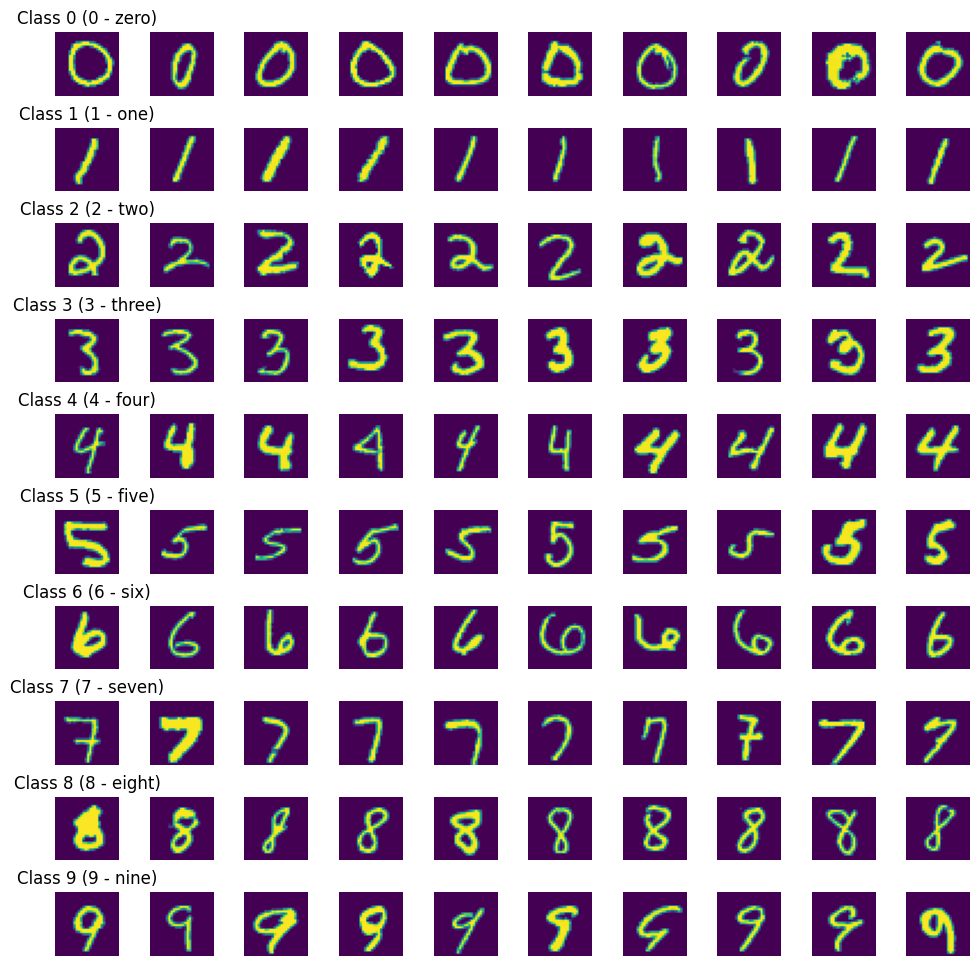

In [ ]:
display_random_images(datasets.MNIST(root='.', train=True, download=True, transform=transforms.ToTensor()), 'mnist')

Files already downloaded and verified


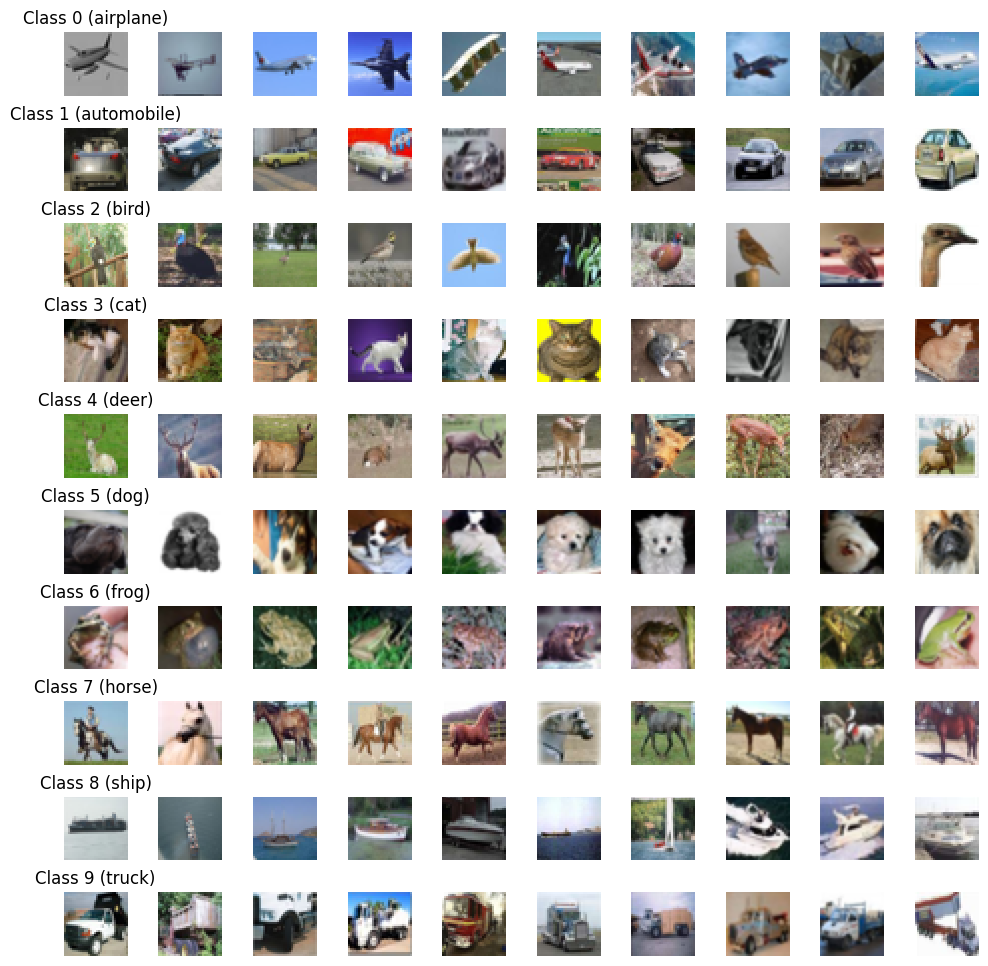

In [ ]:
display_random_images(datasets.CIFAR10(root='.', train=True, download=True, transform=transforms.ToTensor()),'cifar10')

#Given Architecure

In [4]:
dataset= 'mnist'
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [5]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item()
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


#Question 2

In [8]:
#Question 2A
for i in range(20):
  train(i+1)
  test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.137090
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.223757
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.164841
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.267129
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.195659
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.323899
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.535355
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.459303
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.238696
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.120354

Test set: Average loss: 0.2685, Accuracy: 9259/10000 (93%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.310523
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.170422
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.153137
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.486878
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.132524
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.123467
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.219797
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.259061
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.191554
T

Net(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


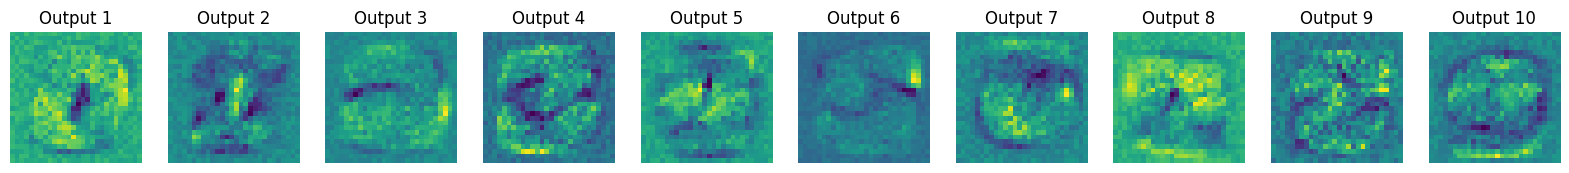

In [10]:
#Question 2B
import matplotlib.pyplot as plt

print(network)
weights = network.linear.weight.data
fig, axes = plt.subplots(1, num_outputs, figsize=(num_outputs * 2, 2))

for i in range(num_outputs):
    weight_image = weights[i].view(28, 28).cpu().numpy()
    ax = axes[i]
    ax.imshow(weight_image)
    ax.axis('off')
    ax.set_title(f'Output {i+1}')


In [21]:
#Question 2c
network1 = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

prev_test_loss = float('inf')
loss_not_improved_count = 0
max_patience = 8  # Adjust this as needed
threshold = 0.001
test_loss = 0
def train(epoch, max_samples=50):
    network1.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if batch_idx * len(data) >= max_samples:
            break
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), min(max_samples, len(train_loader.dataset)),
                100. * batch_idx / len(train_loader), loss.item()))
def test():
    network1.eval()
    global test_loss
    correct = 0
    for data, target in test_loader:
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item()
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# Training loop with a reduced number of samples (50)
test_losses = []
for epoch in range(1, 101):
    train(epoch, max_samples=50)
    test()

    loss_improvement = prev_test_loss - test_loss

    if loss_improvement < threshold:
        loss_not_improved_count += 1
    else:
        loss_not_improved_count = 0

    # Update the previous validation loss
    prev_test_loss = test_loss
    test_loss = "{:.2f}".format(test_loss)
    test_losses.append(test_loss)
    # If the loss hasn't improved for a certain number of consecutive epochs, stop training
    if loss_not_improved_count >= max_patience:
        print("Early stopping: Loss has stabilized.")
        break
    test_loss=0

Train Epoch: 1 [0/50 (0%)]	Loss: 0.278233

Test set: Average loss: 0.2652, Accuracy: 9243/10000 (92%)

Train Epoch: 2 [0/50 (0%)]	Loss: 0.357010

Test set: Average loss: 0.2656, Accuracy: 9247/10000 (92%)

Train Epoch: 3 [0/50 (0%)]	Loss: 0.212183

Test set: Average loss: 0.2658, Accuracy: 9242/10000 (92%)

Train Epoch: 4 [0/50 (0%)]	Loss: 0.320334

Test set: Average loss: 0.2657, Accuracy: 9249/10000 (92%)

Train Epoch: 5 [0/50 (0%)]	Loss: 0.244754

Test set: Average loss: 0.2661, Accuracy: 9247/10000 (92%)

Train Epoch: 6 [0/50 (0%)]	Loss: 0.257771

Test set: Average loss: 0.2658, Accuracy: 9246/10000 (92%)

Train Epoch: 7 [0/50 (0%)]	Loss: 0.278432

Test set: Average loss: 0.2656, Accuracy: 9246/10000 (92%)

Train Epoch: 8 [0/50 (0%)]	Loss: 0.141693

Test set: Average loss: 0.2655, Accuracy: 9245/10000 (92%)

Train Epoch: 9 [0/50 (0%)]	Loss: 0.475528

Test set: Average loss: 0.2655, Accuracy: 9245/10000 (92%)

Early stopping: Loss has stabilized.


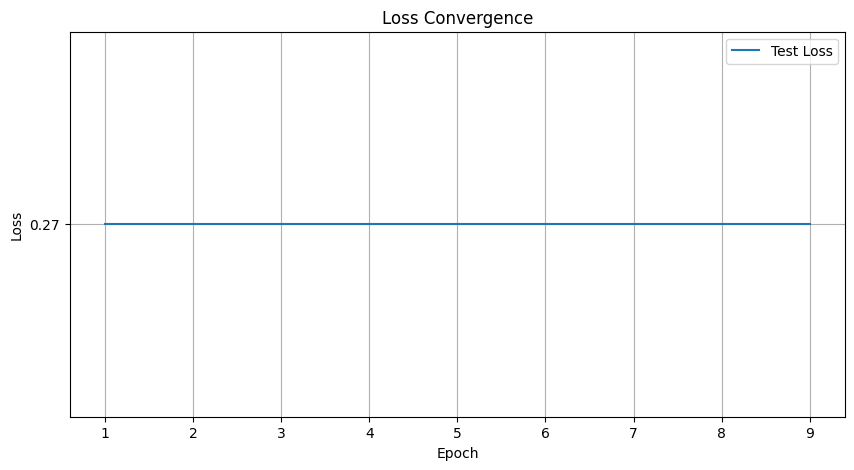

In [22]:
# Plot the loss convergence graph

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(test_losses) + 1), test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Convergence")
plt.legend()
plt.grid(True)
plt.show()

As we can see, there's no change in the accuracy and training loss does not improve. This is because the model could not generalise very well due to the limited amount of data and the model has converged to a point where further training does not lead to substantial improvements.


#Question 3


In [ ]:
import torch.nn as nn
num_outputs = 10
num_inputs = 784
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_inputs, 1000)
        self.tanh1 = nn.Tanh()
        self.fc2 = nn.Linear(1000, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs)
        x = self.tanh1(self.fc1(input))
        output = self.fc2(x)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
#lr = 0.01
for epoch in range(1, 11):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.283006
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.724254
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.554093
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.494287
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.516762
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.422928
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.487651
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.333068
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.232356
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.285645

Test set: Average loss: 0.3224, Accuracy: 9092/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.229816
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.381999
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.248873
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.212898
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.341566
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.337203
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.248946
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.389384
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.345389
T

In [ ]:
import torch.nn as nn
num_outputs = 10
num_inputs = 784
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_inputs, 1000)
        self.tanh1 = nn.Tanh()
        self.fc2 = nn.Linear(1000, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs)
        x = self.tanh1(self.fc1(input))
        output = self.fc2(x)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=10)

def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

for epoch in range(1, 11):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.345486
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1111.182739
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1814.357544
Train Epoch: 1 [19200/60000 (32%)]	Loss: 672.759155
Train Epoch: 1 [25600/60000 (43%)]	Loss: 449.449493
Train Epoch: 1 [32000/60000 (53%)]	Loss: 669.743958
Train Epoch: 1 [38400/60000 (64%)]	Loss: 519.268433
Train Epoch: 1 [44800/60000 (75%)]	Loss: 214.860443
Train Epoch: 1 [51200/60000 (85%)]	Loss: 246.668198
Train Epoch: 1 [57600/60000 (96%)]	Loss: 819.168091

Test set: Average loss: 349.5524, Accuracy: 5088/10000 (51%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 329.026428
Train Epoch: 2 [6400/60000 (11%)]	Loss: 473.197510
Train Epoch: 2 [12800/60000 (21%)]	Loss: 678.733032
Train Epoch: 2 [19200/60000 (32%)]	Loss: 414.117920
Train Epoch: 2 [25600/60000 (43%)]	Loss: 382.984253
Train Epoch: 2 [32000/60000 (53%)]	Loss: 215.841370
Train Epoch: 2 [38400/60000 (64%)]	Loss: 230.296616
Train Epoch: 2 [44800/60000 (75%)]	Loss: 238.016663
Train Epoch: 

###**Since we set a very high learning rate like 10, it leads to the the loss increasing instead of decreasing as opposed to what we see when the lr=0.01. This is because the weights will be adjusted by a large amount, which leads to significant changes in the model's parameters. Additionally, due to the learning rate being very high, instead of reaching a minimum point in the loss landscape, the loss fluctuates by a very high amount, causing the accuracy to drop**

#Question 4


In [9]:
#Question 4a
import torch
import torch.nn as nn
from torchsummary import summary

data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)


train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

class CIFAR10ConvNet(nn.Module):
    def __init__(self):
        super(CIFAR10ConvNet, self).__init__()

        # Layer 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5)
        self.tanh1 = nn.Tanh()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Layer 2
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=128, kernel_size=5)
        self.tanh2 = nn.Tanh()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # FC Layers
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features=128*5*5, out_features=64)
        self.tanh3 = nn.Tanh()
        self.fc2 = nn.Linear(in_features=64, out_features=10)


    def forward(self, input):
        x = input.view(-1, 3, 32, 32) # reshape input to batch x num_inputs
        x = self.maxpool1(self.tanh1(self.conv1(x)))
        x = self.maxpool2(self.tanh2(self.conv2(x)))
        x = self.flatten(x)
        x = self.tanh3(self.fc1(x))
        x = self.fc2(x)
        return x

# class CIFAR10ConvNet(nn.Module):
#     def __init__(self):
#         super(CIFAR10ConvNet, self).__init__()

#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5)
#         self.tanh1 = nn.Tanh()
#         self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)


#         self.conv2 = nn.Conv2d(in_channels=16, out_channels=128, kernel_size=5)
#         self.tanh2 = nn.Tanh()
#         self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)


#         self.fc1 = nn.Linear(128*5*5, 64)
#         self.tanh3 = nn.Tanh()
#         self.fc2 = nn.Linear(64, 10)

#     def forward(self, x):
#         x = self.pool1(self.tanh1(self.conv1(x)))
#         x = self.pool2(self.tanh2(self.conv2(x)))
#         x = x.view(-1, 128*5*5)  # Flatten to 128*5*5 because output dimensions of MaxPool
#         x = self.tanh3(self.fc1(x))
#         x = self.fc2(x)
#         return x


model = CIFAR10ConvNet()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Files already downloaded and verified
Files already downloaded and verified


In [10]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = model(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))



In [11]:
for i in range (1, 21):
  train(i)
  test()

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.297932
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.165807
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.033823
Train Epoch: 1 [19200/50000 (38%)]	Loss: 2.018516
Train Epoch: 1 [25600/50000 (51%)]	Loss: 2.001901
Train Epoch: 1 [32000/50000 (64%)]	Loss: 2.075141
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.800735
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.861311

Test set: Average loss: 1.7684, Accuracy: 3881/10000 (39%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.860240
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.843576
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.620569
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.693671
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.941239
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.613211
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.655045
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.683320

Test set: Average loss: 1.5847, Accuracy: 4363/10000 (44%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.524032
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.484

Parameter containing:
tensor([[[[-3.0911e-02, -1.1400e-01, -8.0586e-02, -1.3750e-01, -1.2307e-01],
          [-1.5427e-01, -2.7091e-02, -1.9313e-01, -8.8863e-02,  1.3350e-01],
          [-1.6875e-02, -2.3007e-01,  1.4594e-02,  4.7811e-02,  1.3096e-01],
          [-2.8374e-02,  1.1028e-02,  1.4968e-01, -7.1417e-02, -1.1485e-01],
          [ 1.3515e-01,  3.2565e-01,  1.7452e-01, -1.5350e-01, -1.1284e-01]],

         [[-7.9822e-02, -1.8174e-01, -1.8868e-01, -2.1408e-01, -5.3045e-02],
          [-6.9602e-02, -2.2807e-01, -5.7862e-02,  5.5431e-02,  1.5827e-02],
          [-1.1035e-01, -1.3800e-01,  3.3830e-04,  2.1449e-01,  9.3135e-02],
          [ 1.1680e-01,  6.6956e-02,  1.0185e-01, -1.4937e-02,  4.9021e-03],
          [ 9.3717e-02,  2.9363e-01,  1.7601e-01, -7.3667e-02, -9.9857e-02]],

         [[-1.7892e-01, -1.0298e-01, -5.3024e-02, -1.9840e-02,  7.6603e-02],
          [-9.8801e-02, -1.6523e-01, -7.4140e-02,  8.1787e-02,  1.1958e-01],
          [ 7.1750e-02, -1.9495e-01, -1.6715e-02, 

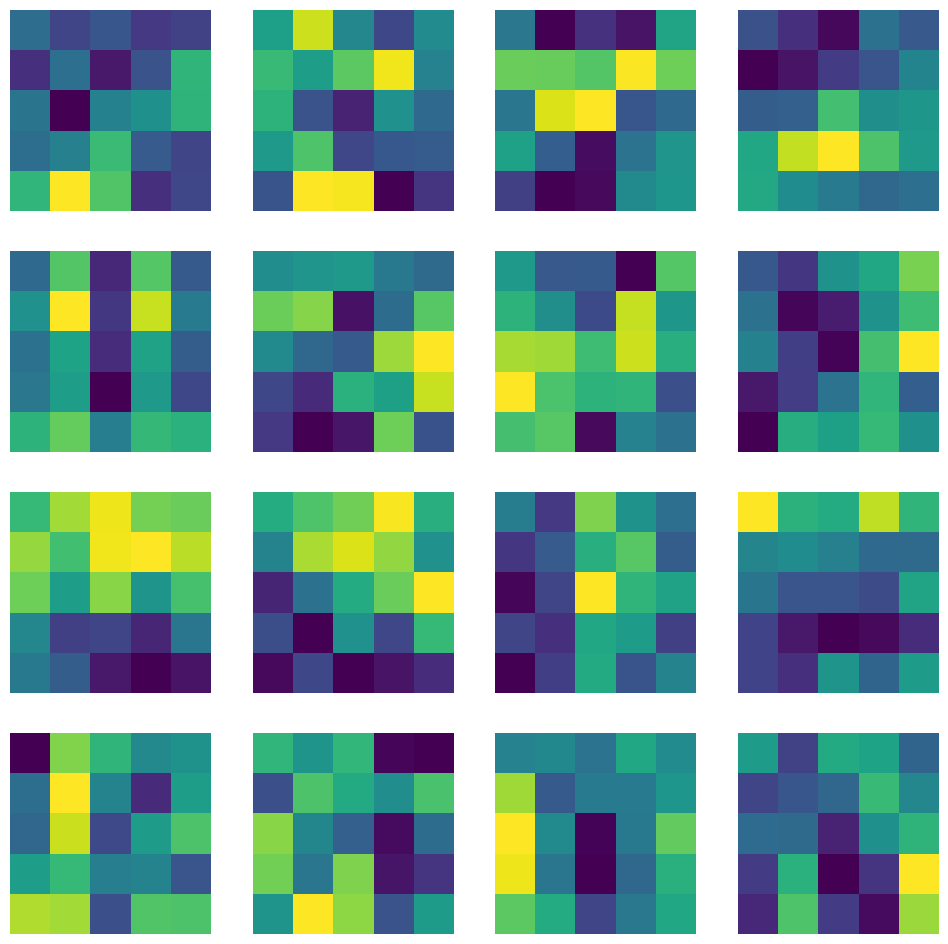

In [13]:
#Question 4b
import numpy as np
import matplotlib.pyplot as plt

first_layer_weights = None
for name, nn.parameter in model.named_parameters():
  if name == 'conv1.weight':
    first_layer_weights = nn.parameter

print(first_layer_weights)
first_layer_weights = first_layer_weights.detach().numpy()

plt.figure(figsize=(12,12))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.imshow((first_layer_weights[i, 0, :, :] + 1)/2)
  plt.axis('off')
plt.show()

In [ ]:
#Question 4c
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]           1,216
              Tanh-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4          [-1, 128, 10, 10]          51,328
              Tanh-5          [-1, 128, 10, 10]               0
         MaxPool2d-6            [-1, 128, 5, 5]               0
            Linear-7                   [-1, 64]         204,864
              Tanh-8                   [-1, 64]               0
            Linear-9                   [-1, 10]             650
Total params: 258,058
Trainable params: 258,058
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.44
Params size (MB): 0.98
Estimated Total Size (MB): 1.43
-------------------------------------------